<a href="https://colab.research.google.com/github/midnightripper/testing/blob/main/Try3233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Prerequisite

In [3]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [4]:
pip install tensorflow-addons[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-serve

Load the train and test data splits

In [5]:
GER_test = (np.array(sio.loadmat('/content/drive/MyDrive/training data/GER_test.mat')['GER_test'])).transpose()
GER_train = (np.array(sio.loadmat('/content/drive/MyDrive/training data/GER_train.mat')['GER_train'])).transpose()
test_frame = pd.DataFrame(GER_test).sort_values(1)
train_frame = pd.DataFrame(GER_train).sort_values(1)

In [5]:
print(f"x_train shape: {GER_train.shape} - y_train shape: {GER_train.shape}")
print(f"x_test shape: {GER_test.shape} - y_test shape: {GER_test.shape}")

x_train shape: (6981, 21) - y_train shape: (6981, 21)
x_test shape: (6248, 21) - y_test shape: (6248, 21)


In [6]:
def get_data_labels(split):
    x = pd.DataFrame(split)
    labels = x[0].values.astype(np.uint8)
    del x[0],x[1]
    data = x.values 
    return data, labels
    #but why?
    ##to create labels ohhh
x_train, y_train = get_data_labels(train_frame.values.tolist())
x_test, y_test = get_data_labels(test_frame.values.tolist())

In [7]:
print(y_train[:5])
print(y_train.shape)

[1 0 0 0 1]
(6981,)


In [8]:
print(x_train[:5])
print(x_train.shape)

[[ 0.04631804  0.14190991  0.08418234  0.38332878  0.13956291  4.50351958
  -1.40879469  6.64747499  0.61780194  0.09405221  0.08239493  0.06977664
   0.02358857  4.42688723 -0.16426972  2.08303284  0.3600657   0.32142857
   0.5       ]
 [ 0.07397126  0.0878519   0.07133727  0.18024259  0.05484237  6.33889059
  -0.64534435  2.39323882  0.38219806  0.04781553  0.04466026  0.07124972
   0.02774154  3.44376844  0.47509284  2.7375382   0.19447861  0.67857143
   0.5       ]
 [ 0.03770867  0.06151615  0.02738048  0.15990569  0.0600172   4.31250852
  -0.65414031  3.28927074  0.18982823  0.071038    0.06528614  0.05745427
   0.01416047  5.0294162  -0.13499718  1.93770483  0.20603255  0.15909091
   0.16853933]
 [ 0.08821136  0.08391754  0.08108698  0.09275925  0.01755766  8.09564386
   0.16275833  1.86848797  0.2671161   0.1004256   0.0960712   0.09572407
   0.0213251   5.22638598  0.23974711  1.93273044  0.30263594  0.27272727
   0.12359551]
 [ 0.06353811  0.06581957  0.06298533  0.06287192  0

In [ ]:
x_new=(x_train-x_train.mean())/x_train.std()
print(x_new[:5])
print(x_new.shape)

[[-0.48415945 -0.43570213 -0.46496532 -0.31332236 -0.43689187  1.77528
  -1.22178351  2.8620914  -0.19446349 -0.4599621  -0.4658714  -0.47226784
  -0.49568145  1.73643362 -0.59091035  0.54828966 -0.32511485 -0.34470074
  -0.25417952]
 [-0.47014151 -0.46310516 -0.47147673 -0.41627057 -0.47983831  2.70566415
  -0.83477615  0.70553892 -0.31389554 -0.48340034 -0.48499981 -0.47152111
  -0.49357623  1.23807218 -0.26680542  0.88007076 -0.40905407 -0.16365829
  -0.25417952]
 [-0.4885237  -0.47645524 -0.49375926 -0.42657973 -0.47721509  1.6784529
  -0.83923499  1.15975438 -0.41141143 -0.47162844 -0.47454417 -0.47851428
  -0.50046073  2.0418669  -0.57607155  0.47462015 -0.40319716 -0.42699276
  -0.42220318]
 [-0.46292294 -0.46509956 -0.46653442 -0.46061753 -0.49873863  3.59619549
  -0.42513367  0.43953282 -0.37223275 -0.45673131 -0.45893863 -0.4591146
  -0.49682884  2.1417146  -0.38610661  0.47209854 -0.35422708 -0.36938834
  -0.44498605]
 [-0.47543027 -0.47427376 -0.47571049 -0.47576798 -0.4980

In [ ]:
# data_augmentation.layers[0].adapt(x_train)

In [9]:
print(x_train[:2])
print(y_train[:2])

[[ 0.04631804  0.14190991  0.08418234  0.38332878  0.13956291  4.50351958
  -1.40879469  6.64747499  0.61780194  0.09405221  0.08239493  0.06977664
   0.02358857  4.42688723 -0.16426972  2.08303284  0.3600657   0.32142857
   0.5       ]
 [ 0.07397126  0.0878519   0.07133727  0.18024259  0.05484237  6.33889059
  -0.64534435  2.39323882  0.38219806  0.04781553  0.04466026  0.07124972
   0.02774154  3.44376844  0.47509284  2.7375382   0.19447861  0.67857143
   0.5       ]]
[1 0]


In [12]:
input_shape=(19,)
num_classes = 2

In [ ]:
# def create_encoder():
#   model = tf.keras.Sequential()
#   model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(19,)))
#   model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(MaxPooling1D(pool_size=2))
#   model.add(Flatten())
#   model.add(Dense(100, activation='relu'))
#   model.add(Dense(n_outputs, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# encoder = create_encoder()
# encoder.summary()

In [ ]:
print(x_train.shape)

(6981, 19)


##Data Augmentations

###Normalization

In [ ]:
# def norm2(X):
#     temp = X.copy()
#     temp = (temp - np.mean(temp, axis = 0))/np.std(temp, axis = 0)
#     return temp
# x_new=np.zeros(x_train.shape)
# x_new = np.append(x_train, norm2(x_train), axis = 0)
# y_train = np.append(y_train, norm2(y_train), axis = 0)
# x_test = norm2(x_test)

#normalising in a different way

# x_train=(x_train-x_train.mean())/x_train.std()
# print(x_train[:5])
# print(x_train.shape)

#Made accuracy of Cross Entrophy to 44%
#Made accuracy of SupCon to  59.64%
#Normalising the vectors was not a good idea

In [13]:
from keras.layers import Layer
from keras import backend as K

class Flip(Layer):
    def __init__(self, **kwargs):
        super(Flip, self).__init__(**kwargs)

In [ ]:
# data_augmentation = keras.Sequential(

In [10]:
def create_encoder_layer(input_size, output_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='relu'))
    return model


In [14]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Input

In [ ]:
class UnitNormLayer(tf.keras.layers.Layer):
    '''Normalize vectors (euclidean norm) in batch to unit hypersphere.
    '''
    def __init__(self):
        super(UnitNormLayer, self).__init__()

    def call(self, input_tensor):
        norm = tf.norm(input_tensor, axis=1)
        return input_tensor / tf.reshape(norm, [-1, 1])

In [ ]:
num_classes = 2
input_shape = (19,)

In [ ]:
# # def encoder_net():
# # 	normalization_layer = UnitNormLayer()

# # 	encoder = tf.keras.applications.ResNet50(weights=None, include_top=False)
# # 	encoder.trainable = False

# # 	embeddings = encoder(inputs, training=False)
# # 	embeddings = GlobalAveragePooling2D()(embeddings)
# # 	norm_embeddings = normalization_layer(embeddings)

# # 	encoder_network = Model(inputs, norm_embeddings)

# # 	return encoder_network

# # Projector Network
# def projector_net():
# 	projector=tf.keras.models.Sequential([
# 		Dense(128, activation="relu", trainable=False),
# 		UnitNormLayer()
# 	])
# 	return projector

In [ ]:
def create_encoder():
    layer1=Dense(units=1024,activation='relu')
    layer2=Dense(units=1024,activation='relu')
    layer3=Dense(units=1024,activation='relu')
    layer4=Dense(units=512,activation='relu')
    resnet=Sequential([layer1,layer2,layer3,layer4])
    inputs = keras.Input(shape=input_shape)
    outputs = resnet(inputs)
    outputs = keras.Input(shape=input_shape)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


In [ ]:
inputs = tf.keras.layers.Input(shape=input_shape)
    
    # Define the encoder layers
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    
    # Define the output layer
    outputs = tf.keras.layers.Dense(8, activation='relu')(x)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='encoder')
    
    # Return the model
    return model

In [ ]:
def create_encoder():
    # resnet = keras.applications.ResNet50V2(
    #     include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    # )

    # inputs = keras.Input(shape=x_train[0].shape)
    # # augmented = data_augmentation(inputs)
    # outputs = inputs
    # model = keras.Sequential(name="cifar10-encoder")
    # model.add(inputs)
    # model.add(outputs)
    # return model
    return Encoder(512)


encoder = create_encoder()

NameError: ignored

In [14]:
def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [ ]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [16]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [15]:
learning_rate = 0.001
batch_size = 265
hidden_units = 32
projection_units = 128
num_epochs = 100
dropout_rate = 0.5
temperature = 0.05

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 4s 3ms/step - loss: 0.6910 - binary_accuracy: 0.5359
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6855 - binary_accuracy: 0.5571
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6839 - binary_accuracy: 0.5564
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6789 - binary_accuracy: 0.5602
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6762 - binary_accuracy: 0.5625
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6675 - binary_accuracy: 0.5771
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6603 - binary_accuracy: 0.5912
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6484 - binary_accuracy: 0.6160
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6400 - binary_accuracy: 0.6436
Epoch 10/100
27/27 [==============================] - 0s 3

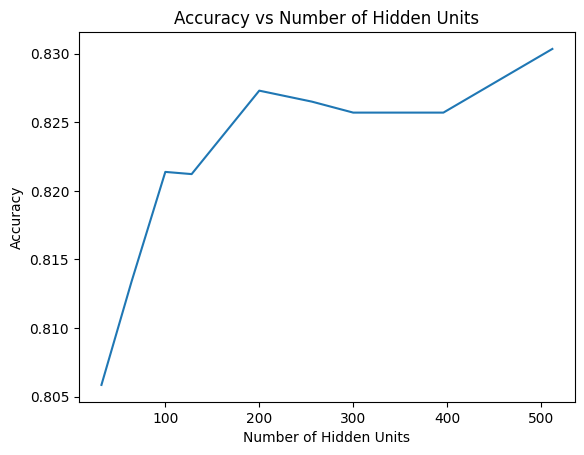

In [ ]:
hidden_units = [32, 64, 100, 128, 200, 256, 300, 396, 512]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for unit in hidden_units:
    clf = create_classifier(unit)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(hidden_units, accuracies)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Units')
plt.show()

Epoch 1/100
27/27 [==============================] - 3s 41ms/step - loss: 0.6409 - binary_accuracy: 0.6353
Epoch 2/100
27/27 [==============================] - 1s 40ms/step - loss: 0.5601 - binary_accuracy: 0.7265
Epoch 3/100
27/27 [==============================] - 1s 40ms/step - loss: 0.5334 - binary_accuracy: 0.7374
Epoch 4/100
27/27 [==============================] - 1s 40ms/step - loss: 0.5100 - binary_accuracy: 0.7548
Epoch 5/100
27/27 [==============================] - 1s 41ms/step - loss: 0.4970 - binary_accuracy: 0.7655
Epoch 6/100
27/27 [==============================] - 1s 40ms/step - loss: 0.4905 - binary_accuracy: 0.7695
Epoch 7/100
27/27 [==============================] - 1s 39ms/step - loss: 0.4789 - binary_accuracy: 0.7797
Epoch 8/100
27/27 [==============================] - 1s 51ms/step - loss: 0.4823 - binary_accuracy: 0.7780
Epoch 9/100
27/27 [==============================] - 2s 71ms/step - loss: 0.4760 - binary_accuracy: 0.7805
Epoch 10/100
27/27 [=================

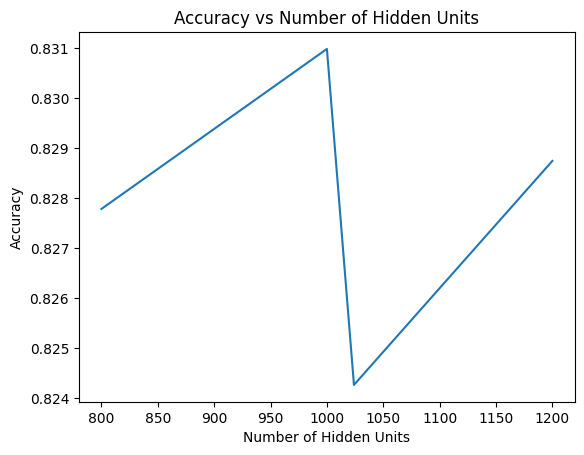

In [ ]:
hidden_units = [800,1000,1024,1200]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for unit in hidden_units:
    clf = create_classifier(unit)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(hidden_units, accuracies)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Units')
plt.show()

Epoch 1/100
27/27 [==============================] - 3s 23ms/step - loss: 0.6474 - binary_accuracy: 0.6194
Epoch 2/100
27/27 [==============================] - 1s 23ms/step - loss: 0.5787 - binary_accuracy: 0.7108
Epoch 3/100
27/27 [==============================] - 1s 36ms/step - loss: 0.5360 - binary_accuracy: 0.7402
Epoch 4/100
27/27 [==============================] - 1s 37ms/step - loss: 0.5199 - binary_accuracy: 0.7539
Epoch 5/100
27/27 [==============================] - 1s 37ms/step - loss: 0.5099 - binary_accuracy: 0.7575
Epoch 6/100
27/27 [==============================] - 1s 37ms/step - loss: 0.4950 - binary_accuracy: 0.7722
Epoch 7/100
27/27 [==============================] - 1s 31ms/step - loss: 0.4886 - binary_accuracy: 0.7684
Epoch 8/100
27/27 [==============================] - 1s 22ms/step - loss: 0.4829 - binary_accuracy: 0.7775
Epoch 9/100
27/27 [==============================] - 1s 22ms/step - loss: 0.4783 - binary_accuracy: 0.7777
Epoch 10/100
27/27 [=================

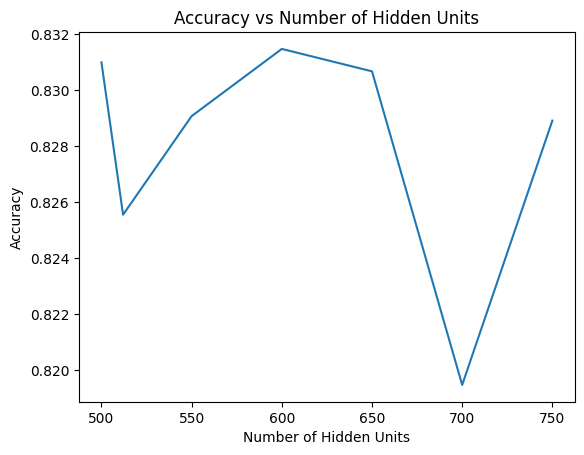

In [ ]:
hidden_units = [500,512,550,600,650,700,750]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for unit in hidden_units:
    clf = create_classifier(unit)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(hidden_units, accuracies)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Units')
plt.show()

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 2s 3ms/step - loss: 0.8417 - binary_accuracy: 0.5216
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6932 - binary_accuracy: 0.5631
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6610 - binary_accuracy: 0.6052
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6459 - binary_accuracy: 0.6299
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6220 - binary_accuracy: 0.6621
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6073 - binary_accuracy: 0.6819
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5832 - binary_accuracy: 0.7081
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5755 - binary_accuracy: 0.7138
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5663 - binary_accuracy: 0.7210
Epoch 10/100
70/70 [==============================] - 0s 3

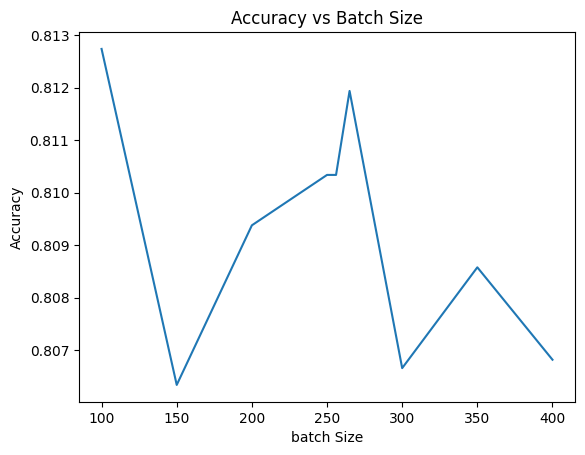

In [ ]:
batch_size = [100,150,200,250,256,265,300,350,400]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in batch_size:
    clf = create_classifier(32)
    clf.fit(x=x_train, y=y_train, batch_size=units, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(batch_size, accuracies)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

In [ ]:
batch_size = [10,30,50,70,80,90,100,110,120,130,140]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in batch_size:
    clf = create_classifier(32)
    clf.fit(x=x_train, y=y_train, batch_size=units, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(batch_size, accuracies)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

TypeError: ignored

Epoch 1/100
27/27 [==============================] - 2s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 8/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 9/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 10/100
27/27 [==========================

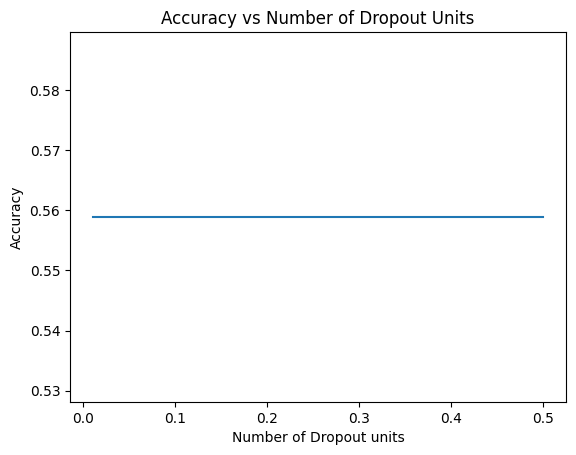

In [ ]:
dropout = [0.01,0.05,0.1,0.2,0.3,0.5]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in dropout:
    clf = create_classifier(units)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(dropout, accuracies)
plt.xlabel('Number of Dropout units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Dropout Units')
plt.show()

In [ ]:
# encoder = create_encoder()
classifier = create_classifier()
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=10)

plt.plot(history.history[keras.metrics.BinaryAccuracy()])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Model: "cifar10-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_285 (InputLayer)      [(None, 19)]              0         
                                                                 
 dense_852 (Dense)           (None, 32)                640       
                                                                 
 dropout_568 (Dropout)       (None, 32)                0         
                                                                 
 dense_853 (Dense)           (None, 16)                528       
                                                                 
 dropout_569 (Dropout)       (None, 16)                0         
                                                                 
 dense_854 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-

KeyError: ignored

Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 1.1940 - binary_accuracy: 0.4544
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.8570 - binary_accuracy: 0.4938
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.7769 - binary_accuracy: 0.5108
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.7292 - binary_accuracy: 0.5237
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.7123 - binary_accuracy: 0.5491
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6854 - binary_accuracy: 0.5728
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.5953
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6542 - binary_accuracy: 0.6181
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_accuracy: 0.6406
Epoch 10/50
27/27 [==============================] - 0s

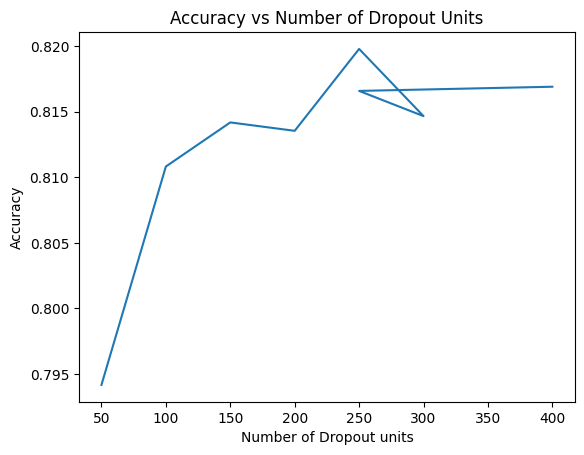

In [ ]:
epochs=[50,100,150,200,250,300,250,400]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in epochs:
    clf = create_classifier()
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=units)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(epochs, accuracies)
plt.xlabel('Number of Dropout units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Dropout Units')
plt.show()

In [23]:
batch_size = 130
hidden_units = 32
num_epochs = 100
dropout_rate = 0.5

In [39]:
print(x_train.shape)
print(y_train.shape)

(6981, 19)
(6981,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [25]:
from keras.layers import LSTM

In [24]:
# def create_classifier():
#   model = Sequential()
#   model.add(LSTM(units=32, activation='relu',input_shape=(None,19)))   
#    # the batch size is neglected!
#   model.add(Dense(1, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam',
#               metrics=['accuracy'])
#   return model

In [23]:
def create_classifier():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(19,1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # model.compile(
  #       optimizer=keras.optimizers.Adam(learning_rate),
  #       loss=keras.losses.BinaryCrossentropy(from_logits=True),
  #       metrics=[keras.metrics.BinaryAccuracy()],
  #   )
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [26]:
# encoder = create_encoder()
classifier = create_classifier()
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)

accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 17, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8, 32)            0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [20]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Reshape((19, 1), input_shape=(19,))

    features=layers.Conv1D(32, kernel_size=3, activation='relu'),
    features=layers.MaxPooling1D(pool_size=2)(features)
    features=layers.Flatten()(features)
    features=layers.Dense(64, activation='relu')(features)
    features=layers.Dense(1, activation='sigmoid')(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)
    # features=layers.Dense(hidden_units, activation="relu")(inputs)
    # features = layers.Dropout(dropout_rate)(features)
    # features = layers.Dense(hidden_units//2, activation="relu")(features)
    # features = layers.Dropout(dropout_rate)(features)
    # outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [ ]:
def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [ ]:

  model_m = Sequential()
  model_m.add(Reshape((x_train, num_sensors), input_shape=(input_shape,)))
  model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
  model_m.add(Conv1D(100, 10, activation='relu'))
  model_m.add(MaxPooling1D(3))
  model_m.add(Conv1D(160, 10, activation='relu'))
  model_m.add(Conv1D(160, 10, activation='relu'))
  model_m.add(GlobalAveragePooling1D())
  model_m.add(Dropout(0.5))
  model_m.add(Dense(num_classes, activation='softmax'))
  print(model_m.summary())


In [ ]:
accuracy = classifier.evaluate(x_train, y_train)[1]
print(f"Train accuracy: {round(accuracy * 100, 2)}%")

219/219 [==============================] - 1s 3ms/step - loss: 0.2959 - binary_accuracy: 0.8767
Train accuracy: 87.67%


In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)

In [ ]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="newloss")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=SupervisedContrastiveLoss(temperature),
        # loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
# encoder = create_encoder()

# encoder_with_projection_head = add_projection_head(encoder)
# encoder_with_projection_head.compile(
#     optimizer=keras.optimizers.Adam(learning_rate),
#     loss=SupervisedContrastiveLoss(temperature),
# )

# encoder_with_projection_head.summary()

# history = encoder_with_projection_head.fit(
#     x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs
# )

In [ ]:
classifier = create_classifier()
classifier.summary()
history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)

accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Model: "newloss"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 19)]              0         
                                                                 
 dense_33 (Dense)            (None, 512)               10240     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 273,922
Trainable params: 273,922
Non-trainab